### 목적

1. scikit-learn API 를 소개하고 사용법을 확인한다. 

2. 회귀, 분류와 같은 주요 머신러닝 모델을 직접 생성해보고 절차를 살펴본다

3. 머신러닝 데이터를 훈련용과 테스트 용으로 나누는 목적과 방법을 이해한다. 

### scikit-lean 라이브러리

- 머신러닝 알고리즘을 구현한 오픈 소스 라이브러리 중 가장 유명한 라이브러리 중 하나 (딥러닝은 텐서플로우나 파이토치)
- 일관되고 간결한 API 가 강점이며, 문서화가 잘되어 있음
- 알고리즘은 파이썬 클래스로 구현되고, 데이터 셋은 Numpy 배열, Pandas DataFrame, Scipy 희소 행렬을 사용할 수 있음 

### Scikit-learn 의 데이터 표현 방식 

#### 특징 행렬 (Feature Matrix)

- 표본(sample) 은 데이터셋이 설명하는 개별 객체를 나타냄
- 특징(feature)은 각 표본을 연속적인 수치값, 부울값, 이산값으로 표현하는 개별 관측치를 의미
- 표본 -> 행렬의 행 
- 행의 개수 -> n_samples
- 특징(feature) -> 행렬의 열
- 열의 개수 -> n_features
- 관례적으로 특징행렬은 변수 X에 저장
- [n_samples, n_features] 형태의 2차원 배열 구조를 사용 (주로 Numpy 배열, Pandas DataFrame, Scipy 희소행렬을 사용 

#### 대상 벡터 (Target vector)

- 연속적인 수치값, 이산 클래스/레이블을 가짐
- 길이 -> n_samples
- 관례적으로 대상 벡터는 변수 y에 저장
- 1차원 배열 구조를 사용 (주로 Numpy 배열, Pandas Series 를 사용)
- 특징 행렬로 부터 예측하고자 하는 값의 벡터
- 종속 변수, 출력 변수, 결과 변수, 반응 변수 라고도 함 

#### Numpy 배열을 이용한 특징 행렬 (X), 대상 벡터 (y)의 생성

In [2]:
import numpy as np

rs = np.random.RandomState(10) 
# 난수: 정의된 범위 내에서 무작위로 추출된 수
# 10 = seed (난수 생성을 할 때 또 다른 똑같은 값을 재현하기 위해서는 난수값이 일치해야한다.그래서 seed 값 고정)
x=10*rs.rand(5) # 0에서 10 사이의 랜덤 값 5개 생성 
y=2*x - 1*rs.rand(5) 
x.shape, y.shape # 원소가 5개인 1차원 배열 

((5,), (5,))

In [4]:
X = x.reshape(-1,1) # shape 변경. 열은 하나로 바꿈 
X.shape # 2차원 배열 구조로 변환 

(5, 1)

#### Pandas DataFrame 을 이용한 특징 행렬 (X), 대상 벡터 (y)의 생성

In [5]:
import seaborn as sns # 시각화 라이브러리, matplotlib 라이브러리의 플러그인 역할
iris = sns.load_dataset("iris")
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.head() # species : label(레이블), 나머지: feature 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Feature Matrix와 Target vector 를 나누는 작업 필요

In [7]:
X = iris.drop("species", axis=1) # 열방향 drop
X.shape # 2차원 배열 구조: 150개의 행과 4개의 열 

(150, 4)

In [8]:
type(X.shape)

tuple

In [9]:
type(X.values) 

numpy.ndarray

In [10]:
y = iris['species'] 
y.shape # 1차원 구조 

(150,)

In [12]:
type(y) 
# pandas 에서 제공해주는 구조가 두개가 있다. 
# 1차원 배열 = Series, 2차원 배열 = DataFrame

pandas.core.series.Series

#### Bunch 객체를 이용한 특징 행렬(X), 대상 벡터(y)의 생성 

In [14]:
from sklearn.datasets import load_iris 
# load~~~ 라는 함수를 이용하면 bunch 객체를 다운 받을 수 있음 

iris = load_iris()
type(iris)

sklearn.utils.Bunch

In [15]:
iris.keys() # 이 key를 이용하면 실제로 객체에 접근할 수 있다 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [20]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [21]:
iris.data.shape

(150, 4)

In [25]:
iris.target # 대상 벡터 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
iris.target.shape

(150,)

In [27]:
iris.target_names # 0은 setosa을 의미 1은 versicolor을 의미. 2는 virginica를 의미

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [28]:
X = iris.data  # 특징행렬 2차원 
y = iris.target # 대상행렬 1차원 

### Scikit-Learn Estimator(측정기) API 기본 활용 절차 

    1. 데이터 준비
    2. 모델 클래스 선택 
    3. 모델 인스턴스 생성과 하이퍼 파라미터 선택 
    4. 특징 행렬과 대상 벡터 준비 (지도 학습)
    5. 모델을 데이터에 적합 
    6. 새로운 데이터를 이용해 예측
    7. 모델 평가 (정확도)

#### 1. 데이터 준비 

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
rs = np.random.RandomState(10) # 재현을 고려해 10으로 고정 
x = 10*rs.rand(100) # 0부터 10 사이에 100개의 데이터 생성 
y = 3*x + 2*rs.rand(100) # 100개 데이터 

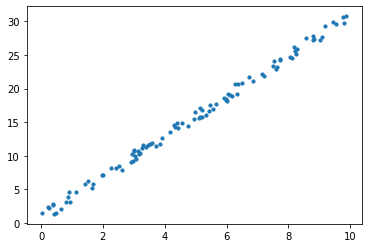

In [35]:
plt.scatter(x,y,s=10) # 사이즈 = 10
# 선형적인 데이터 

#### 2. 모델 클래스 선택 
#### 3. 모델 인스턴스 생성과 하이퍼 파라미터 선택 

In [37]:
# x-> 수치, y-> 수치 / 수치데이터로 수치 를 예측하는 선형 회귀 모델 사용 

In [38]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression() # 인스턴스 만들기 , 생성자 함수 사용 

In [39]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True) # fit_intercept(절편), 하이퍼 파라미터 선택 

#### 4. 특징 행렬과 대상 벡터 준비 (지도 학습)

In [40]:
X = x.reshape(-1,1) # 단순선형회귀 = feature가 한개 (열이 1개)
X.shape, y.shape # numpy 배열 

((100, 1), (100,))

#### 5. 모델을 데이터에 적합

In [41]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
regr.coef_ # 모델에 적합시키면 언더바라는 속성이 생성된다./ coefficient = 기울기

array([2.9855087])

In [43]:
regr.intercept_ # intercept_: y절편 

0.9878534341975644

#### 6. 새로운 데이터를 이용해 예측

In [44]:
x_new = np.linspace(-1,11,num=100) # -1과 11 사이의 값을 100개 만든다. 

In [46]:
X_new = x_new.reshape(-1,1) # 2차원 구조로 만듬 
X_new.shape

(100, 1)

In [47]:
y_pred =  regr.predict(X_new) # 회귀객체 이용 

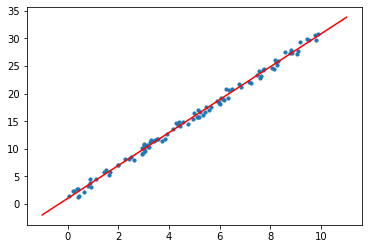

In [48]:
plt.plot(x_new, y_pred, c="red") 
plt.scatter(x,y, s=10)
# 잔차 : 실제값과의 차이 

#### 7. 모델 평가 

In [49]:
from sklearn.metrics import mean_squared_error 
# metrics 모듈에는 평가지표 함수를 많이 담고 있다 
# 회귀 모델의 경우 RMSE 라는 평가도구를 사용 (Root mean squared error: 평균 제곱근 오차)

rmse = np.sqrt(mean_squared_error(y,y_pred)) 
# 실제값과 예측값의 차이의 제곱의 평균을 sqrt을 이용해 근을 씌움 
rmse # rmse 가 0에 가까울수록 정확도가 높은 것을 의미 

13.708237122486333

### 훈련 데이터와 테스트 데이터
정확도가 정말 1.0인가? 

In [50]:
X = iris.data
y = iris.target

In [52]:
from sklearn.neighbors import KNeighborsClassifier # 분류 알고리즘 
knn = KNeighborsClassifier(n_neighbors=1) # 5가 기본값으로 세팅 
# 가장 인접한 몇 개의 점을 이용해 분류 

In [53]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [54]:
y_pred = knn.predict(X) # 훈련된 데이터로 예측을 하니 1이 나온다. 

In [55]:
np.mean(y==y_pred) # 실제값과 예측값이 같다. 

1.0

### 훈련 데이터와 테스트 데이터의 분리 

- 머신러닝 모델을 만들 때 사용한 데이터는 모델의 성능측정용으로 사용하지 않음 -> 일반화 문제
- 훈련 데이터 : 머신러닝 모델을 만들 목적으로 사용
- 테스트 데이터 : 머신러닝 모델이 잘 작동하는지를 측정할 목적으로 사용
- scikit-learn 의 train_test_split 함수를 주로 사용 (기본적으로 훈련용 75%, 테스트용 25% 구성) 

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=25) # 테스트용 20%, 재현을 하기 위해 시드값 설정 = 25

In [57]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [60]:
y_pred = knn.predict(X_test)
y_pred

array([0, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0])

In [61]:
np.mean(y_test==y_pred) # y_test 실제값, y_pred 예측값

0.9

In [62]:
knn.score(X_test,y_test)

0.9

In [63]:
from sklearn.metrics import accuracy_score # metrics 모듈에는 평가지표 함수를 많이 담고 있다 

accuracy_score(y_test,y_pred)

0.9

### 하이퍼파라미터의 선택 

In [64]:
train_accuracy=[]
test_accuracy=[]
neighbors = range(1,11)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test,y_test))

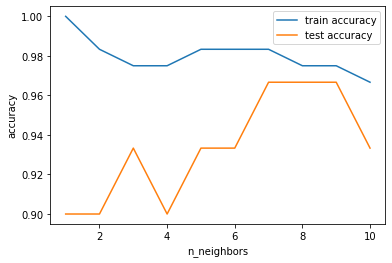

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, train_accuracy, label="train accuracy")
plt.plot(neighbors, test_accuracy, label="test accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()

In [66]:
# 하이퍼 파라미터 선정: 반복에 의한 확인밖에 없다. 

## 주요 정리

    1. scikit-learn 은 데이터를 담고 있는 2차원 구조의 특징 행렬(X)과 레이블을 담고 있는 1차원 구조의 대상벡터 (y)를 사용하도록 설계되어 있습니다. 
    * 데이터 구조 : nparray(1차원), series(1차원,pandas에서 제공), dataframe(2차원), scipy 희소행렬 

    2. scikit-learn 의 Estimator는 공통 인터페이스로 fit, predict, score 메서드를 제공한다. 

    3. 회귀 문제는 선형 알고리즘을 구현되어 있는 LinearRegressor를 사용할 수 있고(평가지표: RMSE) 분류 문제는 분류 알고리즘이 구현되어 있는 KNeighborsClassifier를 사용할 수 있다(accuracy 사용)

    4. scikit-learn의 train_test_split 함수를 이용해 훈련 데이터와 테스트 데이터를 나누고, 모델의 성능은 테스트 데이터를 이용해 측정합니다. 